In [2]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

# S.12 상관관계
- 상관관계: 변수간에 서로 어떤 관계가 있는지, 그 변화의 **방향, 강도**
- 연속변수 간 상관관계 계산 -->o
- 명목변수 간 상관관계 계산 -->x : **빈도분석**


- 상관관계 있다 -> 인과관계 있다(X) ex)맥주와 선풍기
- ex) 교통상황 안좋음-> 약속 늦음 (O), 약속 늦음->교통상황 안좋음(X)

## S.12.1 상관관계 방향과 강도
- $+$ 변수가 서로 같은 방향으로 변동, 숫자가 클수록 강도가 크며 반대로 적을수록 적다.
- 0 변수가 서로 영향을 주지 않음
- $-$ 변수가 서로 다른 방향으로 변동

상관관계는 공분산 covariance를 표준편차의 곱으로 나눈 값으로 계산한다.

$$ r_{(x,y)} = \frac {cov(x,y)} {s_x s_y} $$$$ cov(x,y)=\frac{ \sum\limits_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y} ) } {n-1} $$
바로 계산하면 n-1이 표준편차 계산하면서 상쇄되므로 아래와 같다:

$$ r = \frac{\sum\limits_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum\limits_{i=1}^n (X_i - \bar{X})^2} \sqrt{\sum \limits_{i=1}^n (Y_i - \bar{Y})^2}} $$

## S.12.2 그래프

#### 데이터 생성
변수들이 서로 어떤 관계를 가지고 있는지 그래프를 그려보면 쉽게 파악할 수 있다. 우선 임의로 X, Y 데이터를 생성하고, 그래프에서 서로 어떻게 변화하는지 알아보자.

In [4]:
X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

#### 단순 Plot

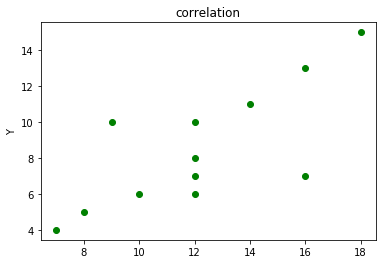

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.title('correlation')
plt.plot(X, Y, 'go') #X,Y 가져옴, spark자체 그래프 기능 없다.. go는 동그라미
plt.ylabel('Y')

plt.show()

#### Scatter

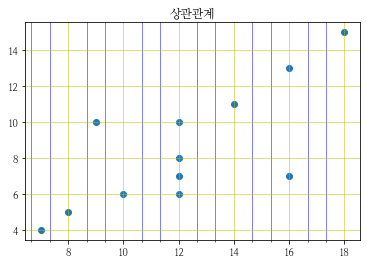

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager #한글안나면 이거쓰기

fig, ax = plt.subplots(1, 1)
plt.rc('font', family='NanumMyeongjo')
ax.title.set_text('상관관계')
ax.scatter(X, Y)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(1))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax.grid(b=True, which='major', color='y', linewidth=0.5) #major 노란선
ax.grid(b=True, which='minor', color='b', linewidth=0.5) #minor 파란선
#fig.show()

## S.12.3 데이터
임의로 X, Y 데이터를 생성해보자

In [ ]:
#X=[2.1,2.5,4.0,3.6]
#Y=[8,12,14,10]

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

## S.12.4 numpy 공분산 계산

#### 공분산 계산식
라이브러리를 사용하지 않고, 공분산을 계산해보자. 공분산의 부호는 두 변수가 같은 방향, 다른 방향으로 움직이는지 보여준다. 공분산이 '0'이라면 두 변수가 독립적이란 의미이다. 크기는 해석하기 어렵다.

In [7]:
import numpy as np
xbar=np.mean(X)
ybar=np.mean(Y)

In [8]:
# 공분산 계산식
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1) #XY길이 같아서 len(Y)로 해도 상관없다
print ("simple cov=", covxy)

simple cov= 8.454545454545455


#### numpy 공분산
numpy로 공분산을 계산해보자. 앞에서의 계산과 동일한 결과를 출력한다. numpy 공분산은 계산하면 x,y 컬럼에 대한 2 x 2 값을 출력한다. 공분산값은 x와 y 컬럼이 교차하는 값이다

In [9]:
print ("np cov=\n",np.cov(X,Y))
# X  
#   Y

np cov=
 [[11.42424242  8.45454545]
 [ 8.45454545 11.18181818]]


In [10]:
print (np.sum( (X-np.mean(X))**2) / (len(X)-1))
print (np.sum( (Y-np.mean(Y))**2) / (len(Y)-1))

11.424242424242424
11.181818181818182


In [11]:
print(np.var(X, ddof=1))

11.424242424242424


In [12]:
print ("npcov of X", np.cov(X)) #sum( [ (x-xbar)**2 for x in X ])/(len(X)-1)
print ("npcov of Y", np.cov(Y))

npcov of X 11.424242424242426
npcov of Y 11.181818181818182


## S.12.5 상관관계
상관관계는 공분산을 표준편차의 곱으로 나누어서 계산한다.

#### numpy 계산
앞서 계산했던 식을 기억하고, 그 값을 가져온다.

In [13]:
import numpy as np

# 표준편차는 평균을 구해야지 가능!
xbar=np.mean(X)
ybar=np.mean(Y)
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)

In [14]:
rxy=covxy/(sx*sy)
print ("corr: ",rxy)
# 상당히 x, y간에 관계가 있다.

corr:  0.7480322896763185


#### 상관관계 계산식
위 계산식을 모두 한꺼번에 넣어, 계산해보자.

In [15]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer/denom)

0.7480322896763182


## S.12.6 zscore를 이용한 상관관계
상관관계는$$ \sum \frac{z_x . z_y} {N} $$N은 x,y가 쌍이므로 어느 한 변수의 size를 택해도 같다.

negative란 한 변수가 높을 때 (postive z score) 다른 변수가 낮은 값 (negative z score)을 갖는 것으로 곱하면 음수가 되게 된다

In [16]:
numer =  sum ( [ ( (x-np.mean(X))/np.std(X) ) * ( (y-np.mean(Y))/np.std(Y) ) for x,y in zip(X,Y) ] )

print(f"분자: {numer}")

분자: 8.97638747611582


In [19]:
import scipy.stats as stats
print(sum (stats.zscore(X) * stats.zscore(Y)))

8.97638747611582


In [20]:
print(sum (stats.zscore(X) * stats.zscore(Y))/len(X))

0.7480322896763183


## S.12.7 함수로 만들어 보기

In [21]:

import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer, denom, numer/denom)

93.0 124.32618388738557 0.7480322896763182


In [22]:

numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
denom=np.sqrt(denom1*denom2)
print(numer,denom,numer/denom)

93.0 124.32618388738557 0.7480322896763182


In [23]:
def pearson(X,Y):
    numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
    denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
    denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
    denom=np.sqrt(denom1*denom2)
    #print(numer,denom,numer/denom)
    r=1 if denom==0 else numer/denom #분모가 0이면 문제 발생
    return r

In [24]:
pearson(X,Y)

0.7480322896763182

## S.12.8 scipy
scipy 라이브러리를 사용하여 pearson 상관관계를 계산해보자. 상관관계는 앞서 계산과 동일하며, 양측 확률이 같이 출력되고 있다 (two-tailed p-value).

- Pearson 상관관계는 **정규분포**인 경우,
- Spearman 상관관계는 정규분포가 아닌 경우 사용한다.

In [36]:
import scipy.stats as stats
stats.pearsonr(X,Y) # 상관관계, pvalue 0.005 상당히 유의적인 관계가 있다는 뜻

(0.7480322896763184, 0.005144376414013737)

In [37]:
import numpy as np
xx=np.random.normal(0,1,100)
yy=np.random.normal(0,1,100)

In [38]:
stats.pearsonr(xx,yy)

(0.018089302951028847, 0.858225601199852)

spearmanr: 비모수 추정방법
- 보통 rank에 따라 차이가 있는가 확인

In [28]:
stats.spearmanr(xx,yy)

SpearmanrResult(correlation=-0.058793879387938786, pvalue=0.5612068041119335)

동위에 의한 상관관계를 계산한다.
- 랜덤으로 두 값 뽑았으므로 상관관계 낮다.
- correlation: 낮다. pvalue: 크다

In [29]:
stats.kendalltau(xx,yy)

KendalltauResult(correlation=-0.03797979797979799, pvalue=0.5755572285803087)

## S.12.9 spark
각 컬럼에 무작위 수를 10개를 생성하자.

In [39]:
from pyspark.sql.functions import rand
#seed번호 같으면 같은 랜덤번호가 생성
df = spark.range(0, 10).withColumn('rand1', rand(seed=10)).withColumn('rand2', rand(seed=27))

In [40]:
print (df.stat.corr('rand1', 'rand2'))

0.13506684062243296


In [41]:
print (df.stat.corr('id', 'id')) #자신들끼리: 매우관계

1.0


## ~S.12.10 scipy.stats (생략)~

## S.12.11 상관관계 표
상관관계를 계산하게 될 변수 a, b, c, d를 임의의 소수로 설정하자.

In [42]:
import numpy as np

a=np.array([0.1, .32, .2, 0.4, 0.8])
b=np.array([.23, .18, .56, .61, .12])
c=np.array([.9, .3, .6, .5, .3])
d=np.array([.34, .75, .91, .19, .21])

In [43]:
np.corrcoef([a,b,c,d])

array([[ 1.        , -0.35153114, -0.74736506, -0.48917666],
       [-0.35153114,  1.        ,  0.23810227,  0.15958285],
       [-0.74736506,  0.23810227,  1.        , -0.03960706],
       [-0.48917666,  0.15958285, -0.03960706,  1.        ]])